# Datasets : Web Server Access Logs
    
####    1.  [Webserver logs](https://www.kaggle.com/datasets/eliasdabbas/web-server-access-logs)

### About Dataset
- Context
Web sever logs contain information on any event that was registered/logged. This contains a lot of insights on website visitors, behavior, crawlers accessing the site, business insights, security issues, and more.

- This is a dataset for trying to gain insights from such a file.

- Content
3.3GB of logs from an Iranian ecommerce website zanbil.ir.

- Acknowledgements
Zaker, Farzin, 2019, "Online Shopping Store - Web Server Logs", https://doi.org/10.7910/DVN/3QBYB5, Harvard Dataverse, V1

#### Features of the dataset
- IP Address: The IP address of the client who made the request.
- Timestamp: The date and time when the request was made.
- HTTP Method: The HTTP method used for the request (e.g., GET, POST, etc.).
- Request URL: The URL or path requested by the client.
- HTTP Protocol: The version of the HTTP protocol used for the request (e.g., HTTP/1.1).
- Response Code: The HTTP response code returned by the server (e.g., 200 for successful response).
- Response Size: The size of the response in bytes.
- User-Agent: The user agent string sent by the client's browser or application.
- Referrer Information: Information about the referring page or source that led to the request.

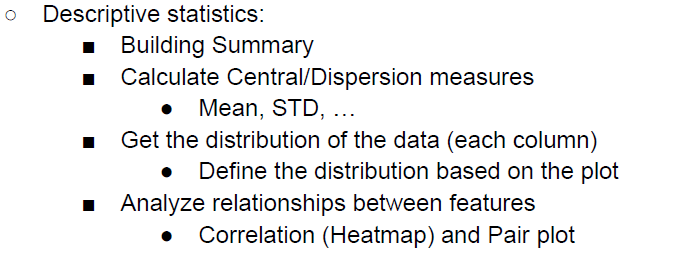

In [1]:
# Libraries

import re
import json
import ijson
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the access.log file
with open('access.log', 'r') as file:
    log_entries = file.readlines()

# List to store the parsed log entries
parsed_entries = []

# Iterate over each log entry
for log_entry in log_entries:
    # Split the log entry by space
    split_entry = log_entry.split()

    # Ensure the split_entry has enough elements
    if len(split_entry) >= 14:
        # Extracting columns
        ip_address = split_entry[0]        
        timestamp = split_entry[3][1:] + ' ' + split_entry[4][:-1]        
        http_method = split_entry[5][1:]      
        request_url = split_entry[6]  
        http_protocol = split_entry[7][:-1]      
        response_code = split_entry[8]     
        response_size = split_entry[9]      
        user_agent = split_entry[11][1:-1]
        referrer = split_entry[13][1:-1]

        # Creating a dictionary for the log entry
        entry_dict = {
            'IP Address': ip_address,
            'Timestamp': timestamp,
            'HTTP Method': http_method,
            'Request URL': request_url,
            'HTTP Protocol': http_protocol,
            'Response Code': response_code,
            'Response Size': response_size,
            'User-Agent': user_agent,
            'Referrer Information': referrer
        }

        # Appending the dictionary to the list
        parsed_entries.append(entry_dict)

# the parsed entries to access.json file
with open('access.json', 'w') as file:
    json.dump(parsed_entries, file, indent=4)

In [3]:
chunk_size = 10000 

# the JSON file for streaming
with open('access.json', 'r') as file:
    # an iterator for the JSON objects
    objects = ijson.items(file, 'item')
    chunks = []

    # Iterate over the JSON objects in chunks
    for i, obj in enumerate(objects):
        chunks.append(obj)
        if i + 1 == chunk_size:
            break

# Creating a DataFrame from the chunks
df = pd.DataFrame(chunks)

df


,IP Address,Timestamp,HTTP Method,Request URL,HTTP Protocol,Response Code,Response Size,User-Agent,Referrer Information
0,54.36.149.41,22/Jan/2019:03:56:14 +0330,GET,/filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...,HTTP/1.1,200,30577,Mozilla/5.,hrefsBot/6.1
1,31.56.96.51,22/Jan/2019:03:56:16 +0330,GET,/image/60844/productModel/200x200,HTTP/1.1,200,5667,Mozilla/5.,ndroi
2,31.56.96.51,22/Jan/2019:03:56:16 +0330,GET,/image/61474/productModel/200x200,HTTP/1.1,200,5379,Mozilla/5.,ndroi
3,40.77.167.129,22/Jan/2019:03:56:17 +0330,GET,/image/14925/productModel/100x100,HTTP/1.1,200,1696,Mozilla/5.,ingbot/2.0
4,91.99.72.15,22/Jan/2019:03:56:17 +0330,GET,/product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%...,HTTP/1.1,200,41483,Mozilla/5.,
...,...,...,...,...,...,...,...,...,...
9995,23.101.169.3,22/Jan/2019:04:37:49 +0330,GET,/image/13272/productTypeMenu,HTTP/1.1,200,11,Mozilla/5.,SI
9996,23.101.169.3,22/Jan/2019:04:37:49 +0330,GET,/image/13124/productTypeMenu,HTTP/1.1,200,11,Mozilla/5.,SI
9997,23.101.169.3,22/Jan/2019:04:37:49 +0330,GET,/static/images/amp/telegram.png,HTTP/1.1,200,4859,Mozilla/5.,SI
9998,23.101.169.3,22/Jan/2019:04:37:49 +0330,GET,/image/10136/productTypeMenu,HTTP/1.1,200,11,Mozilla/5.,SI


## Building Summary 

In [4]:
df.describe()

,IP Address,Timestamp,HTTP Method,Request URL,HTTP Protocol,Response Code,Response Size,User-Agent,Referrer Information
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,608,2352,3,7030,2,8,5712,14,30
top,66.249.66.194,22/Jan/2019:04:35:32 +0330,GET,/settings/logo,HTTP/1.1,200,0,Mozilla/5.,ndroi
freq,1365,46,9804,244,9994,9008,721,9367,2765


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   IP Address            10000 non-null  object
 1   Timestamp             10000 non-null  object
 2   HTTP Method           10000 non-null  object
 3   Request URL           10000 non-null  object
 4   HTTP Protocol         10000 non-null  object
 5   Response Code         10000 non-null  object
 6   Response Size         10000 non-null  object
 7   User-Agent            10000 non-null  object
 8   Referrer Information  10000 non-null  object
dtypes: object(9)
memory usage: 703.2+ KB


## Calculate Central/Dispersion measures
-  Mean, STD, …

Categorical data does not have a meaningful interpretation for mean, standard deviation, or variance. These statistical measures are typically used for numerical data.

In [6]:
# Extracting the IP addresses from the DataFrame
ip_addresses = df['IP Address']

mode_ip = ip_addresses.mode()[0]
# IP address that is most commonly associated with the recorded events or activities in the dataset. 
print("Mode IP Address:", mode_ip)

Mode IP Address: 66.249.66.194


## Analyze relationships between features
- Correlation (Heatmap) and Pair plot

In [7]:
# Converting the 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z')

# Group IP addresses by date and count their occurrences
ip_counts = df.groupby(df['Timestamp'].dt.date)['IP Address'].value_counts()

# the most frequent IP address for each date
most_frequent_ips = ip_counts.groupby(level=0).idxmax().values

# the frequencies of IP addresses for each date
for date, ip in most_frequent_ips:
    frequency = ip_counts[date][ip]
    print(f"Date: {date}, IP Address: {ip}, Frequency: {frequency}")


Date: 2019-01-22, IP Address: 66.249.66.194, Frequency: 1365


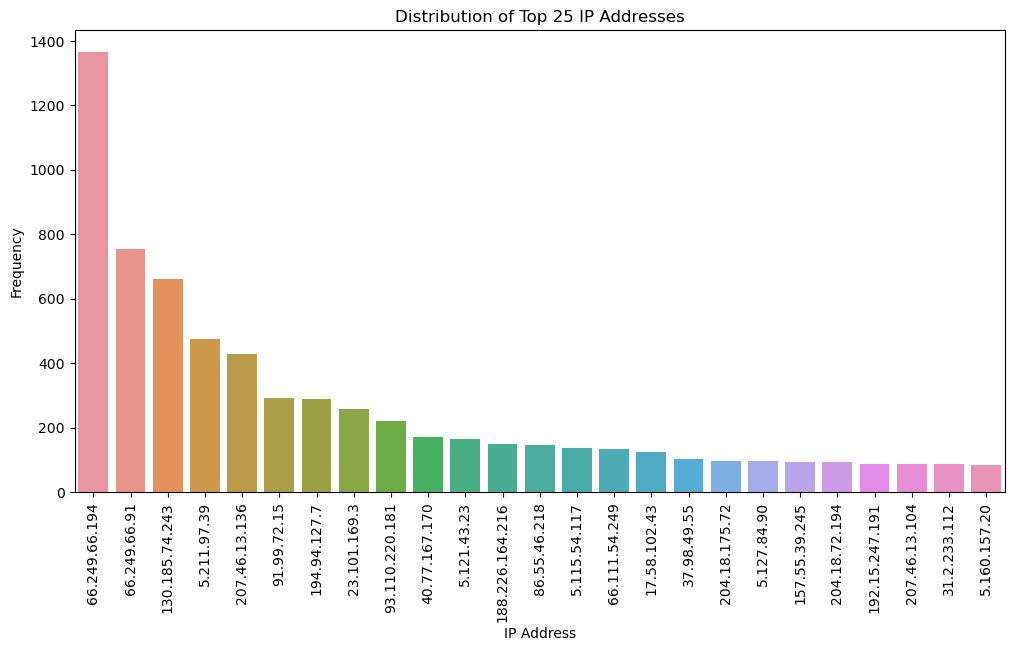

In [63]:
# Count the occurrences of each unique IP address
ip_counts = df['IP Address'].value_counts()

# Get the top 25 IP addresses
top_25_ip_counts = ip_counts.head(25)

# Creating a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_25_ip_counts.index, y=top_25_ip_counts.values)
plt.xticks(rotation=90)
plt.xlabel('IP Address')
plt.ylabel('Frequency')
plt.title('Distribution of Top 25 IP Addresses')
plt.show()


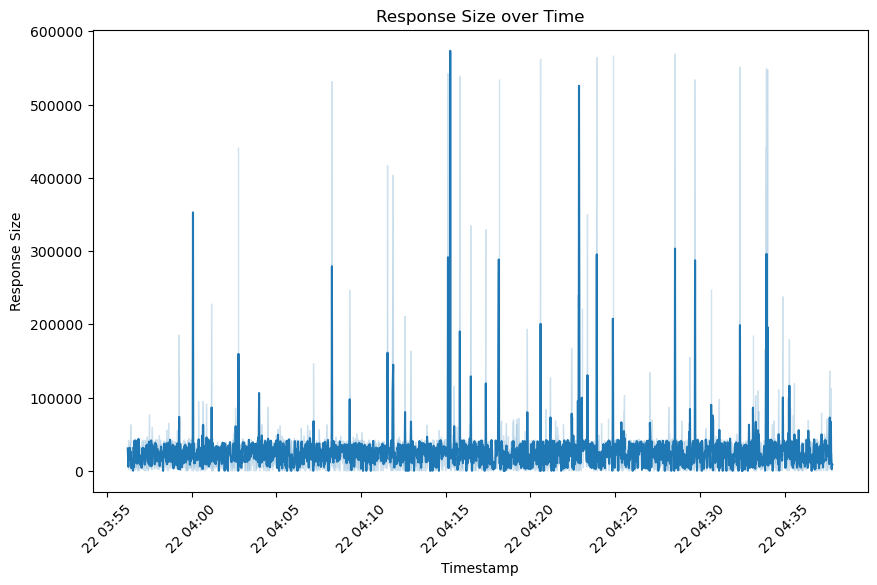

In [9]:
# Converting 'Response Size' to numeric type
df['Response Size'] = pd.to_numeric(df['Response Size'], errors='coerce')

# Extracting relevant time information
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z')
df['Date'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute

# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Timestamp', y='Response Size', data=df)
plt.title('Response Size over Time')
plt.xlabel('Timestamp')
plt.ylabel('Response Size')
plt.xticks(rotation=45)
plt.show()

C:\Users\35840\AppData\Local\Temp\ipykernel_1968\4146239822.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Timestamp', y='Response Size', data=df, estimator='sum', ci=None)


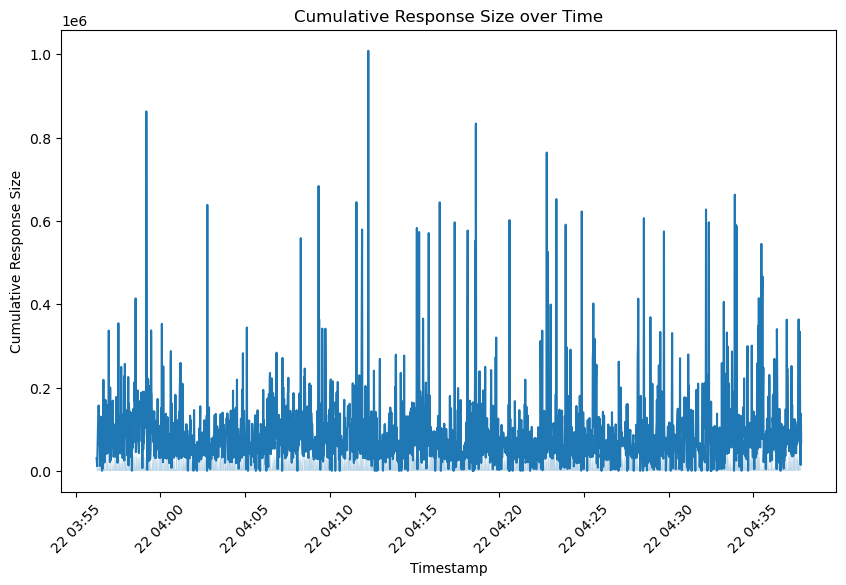

In [10]:
# Area Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Timestamp', y='Response Size', data=df, estimator='sum', ci=None)
plt.fill_between(df['Timestamp'], df['Response Size'], alpha=0.3)
plt.title('Cumulative Response Size over Time')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Response Size')
plt.xticks(rotation=45)
plt.show()

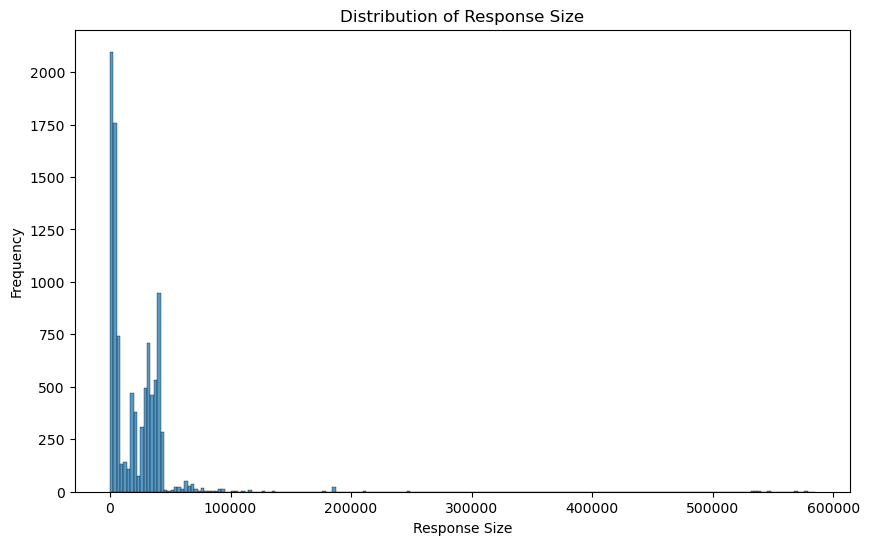

In [11]:
# Histogram of Distribution of Response Size
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Response Size')
plt.title('Distribution of Response Size')
plt.xlabel('Response Size')
plt.ylabel('Frequency')
plt.show()

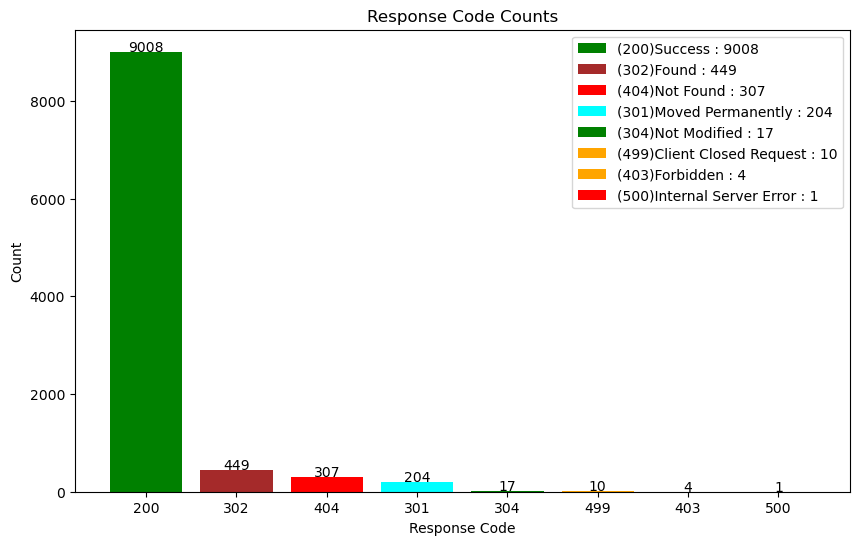

In [6]:
response_code_meanings = {
    '200': 'Success',
    '404': 'Not Found',
    '302': 'Found',
    '301': 'Moved Permanently',
    '304': 'Not Modified',
    '499': 'Client Closed Request',
    '500': 'Internal Server Error',
    '403': 'Forbidden',
    
}

# Count the occurrences of each response code
response_code_counts = df['Response Code'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))

colors = ['green', 'ruby', 'blue', 'orange', 'red', 'cyan', 'brown', 'mint']  

for code, count in response_code_counts.items():
    meaning = response_code_meanings.get(code, 'Other')
    plt.bar(str(code), count, color=colors[int(code) % len(colors)], label=f'({code}){meaning} : {count}')
    plt.text(str(code), count + 10, str(count), ha='center')

plt.title('Response Code Counts')
plt.xlabel('Response Code')
plt.ylabel('Count')
plt.legend()
plt.show()

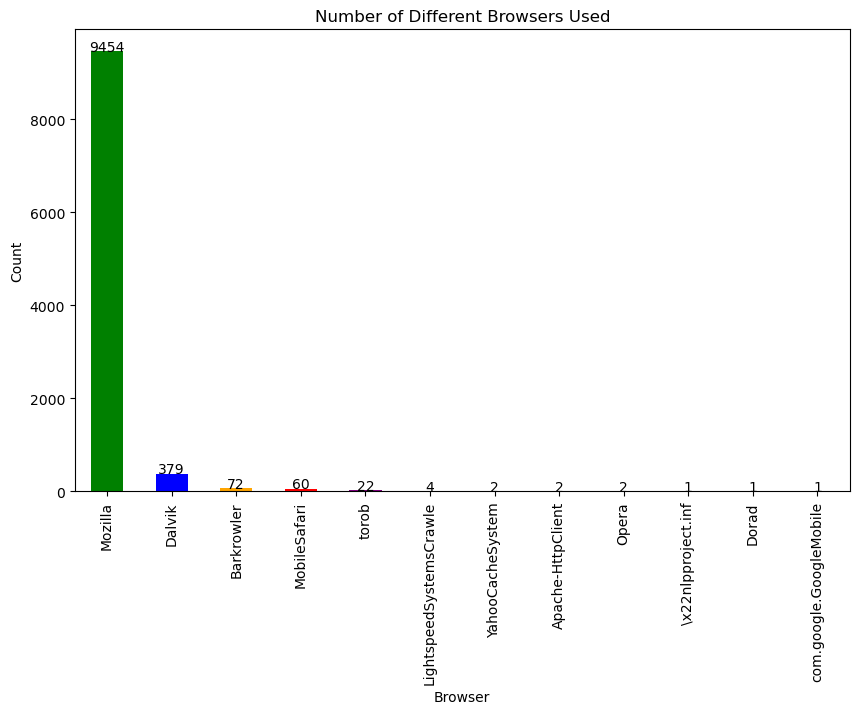

In [24]:
# Extracting the browser names by splitting on the '/' and taking the first part
df['Browser'] = df['User-Agent'].str.split('/', n=1, expand=True)[0]

# Count the occurrences of each browser
browser_counts = df['Browser'].value_counts()

colors = ['green', 'blue', 'orange', 'red', 'purple', 'cyan', 'magenta', 'yellow'] 

# Plotting a bar chart with different colors
plt.figure(figsize=(10, 6))
browser_counts.plot(kind='bar', color=colors)

plt.title('Number of Different Browsers Used')
plt.xlabel('Browser')
plt.ylabel('Count')

for i, count in enumerate(browser_counts):
    plt.text(i, count + 10, str(count), ha='center')

plt.show()

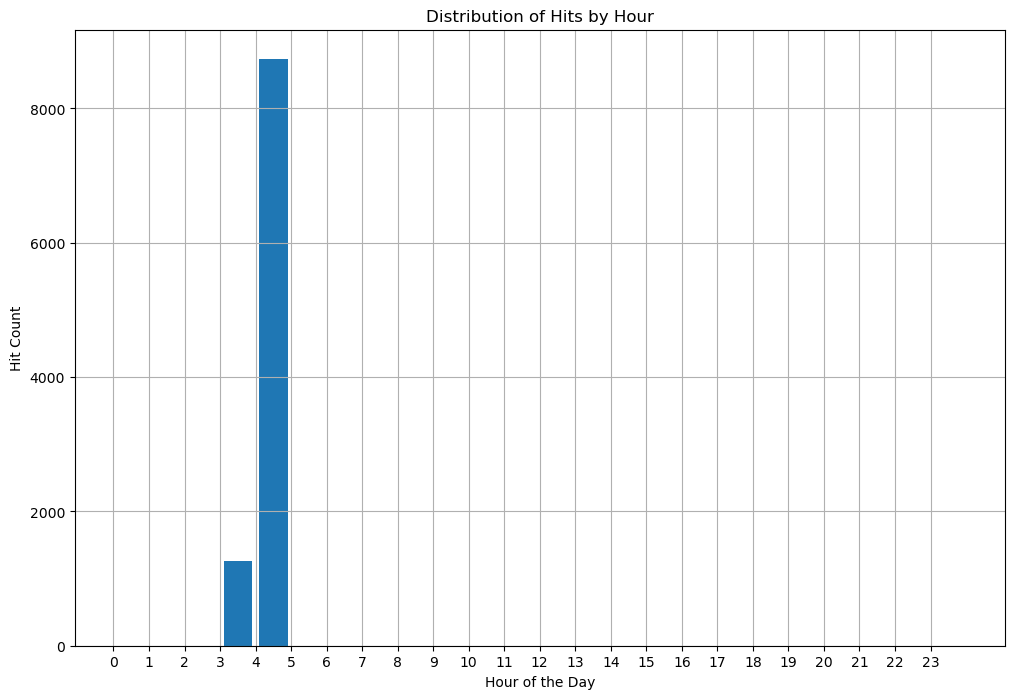

In [71]:
# Extracting the hour from the 'Timestamp' column
df['Hour'] = df['Timestamp'].dt.hour

# the histogram of hits by hour
plt.figure(figsize=(12, 8))
df['Hour'].hist(bins=24, rwidth=0.8, range=(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Hit Count')
plt.title('Distribution of Hits by Hour')
plt.xticks(range(0, 24))
plt.show()


## Correaltion matrix(Heatmap) and Pair plot
The Correaltion matrix(Heatmap) and pair plot are not meaningful for categorical data.  Correlation is a statistical measure that quantifies the relationship between two continuous variables.Since categorical variables represent discrete categories or labels, there is no inherent numerical relationship or ordering between them. Therefore, calculating the correlation between categorical variables does not provide meaningful insights into their relationship or association.
Similarly, the pair plot is primarily used for visualizing relationships between numerical variables. It displays scatter plots for numeric variables and histograms for categorical variables. This is why I did not visualize the pair plot.

## Get the distribution of the data (each column)
- Define the distribution based on the plot

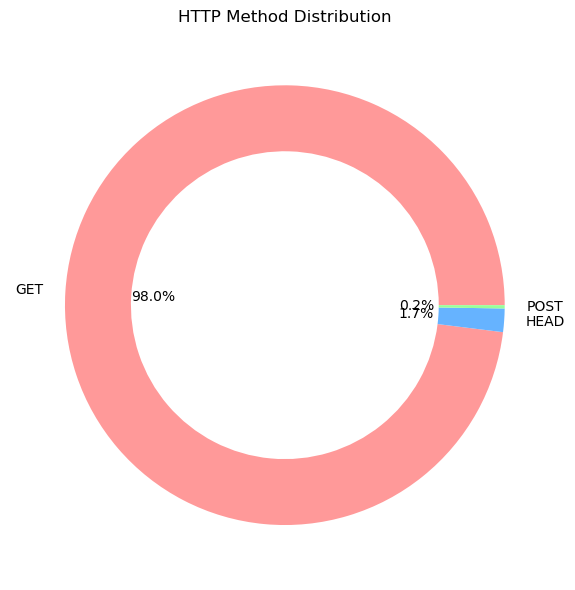

In [14]:
# Extracting the HTTP Method column
http_methods = df['HTTP Method']

# Count the occurrences of each HTTP method
http_method_counts = http_methods.value_counts()

# a pie chart
plt.figure(figsize=(8, 6))
http_method_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], wedgeprops=dict(width=0.3))

plt.title('HTTP Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

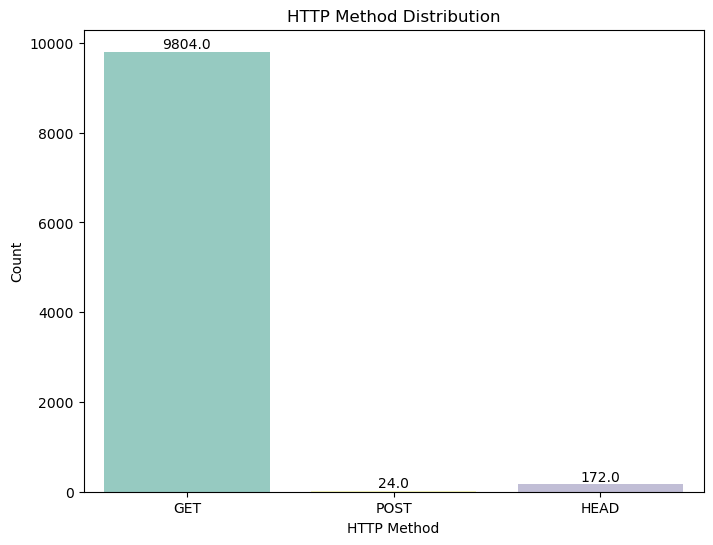

In [15]:
# HTTP Method Distribution: count plot

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='HTTP Method', palette='Set3')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the chart title and labels
plt.title('HTTP Method Distribution')
plt.xlabel('HTTP Method')
plt.ylabel('Count')

plt.show()

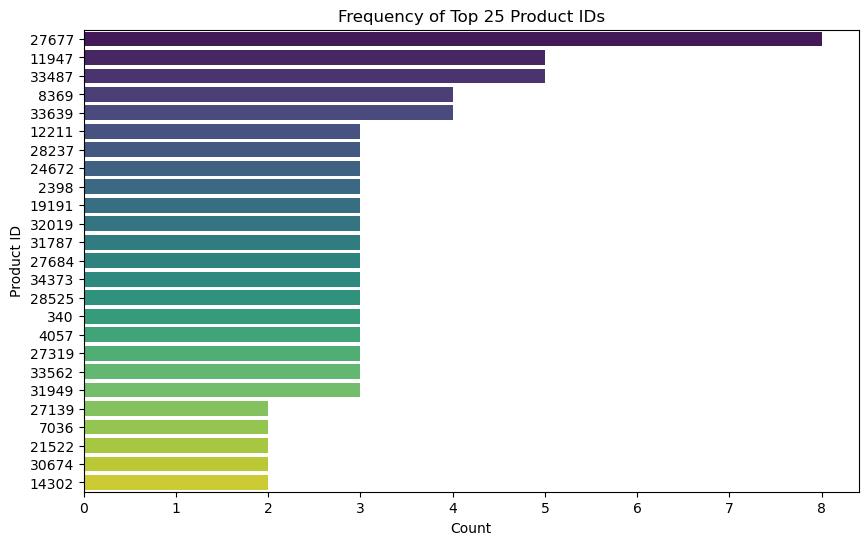

In [25]:
# Extract the product IDs from the Request URL column using regular expressions
df['Product ID'] = df['Request URL'].str.extract(r'/product/(\d+)/')

# Count the frequency of each product ID
product_id_counts = df['Product ID'].value_counts()

top_25_product_ids = product_id_counts.head(25)

# a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=top_25_product_ids.index, x=top_25_product_ids.values, palette='viridis')
plt.title('Frequency of Top 25 Product IDs')
plt.xlabel('Count')
plt.ylabel('Product ID')
plt.show()

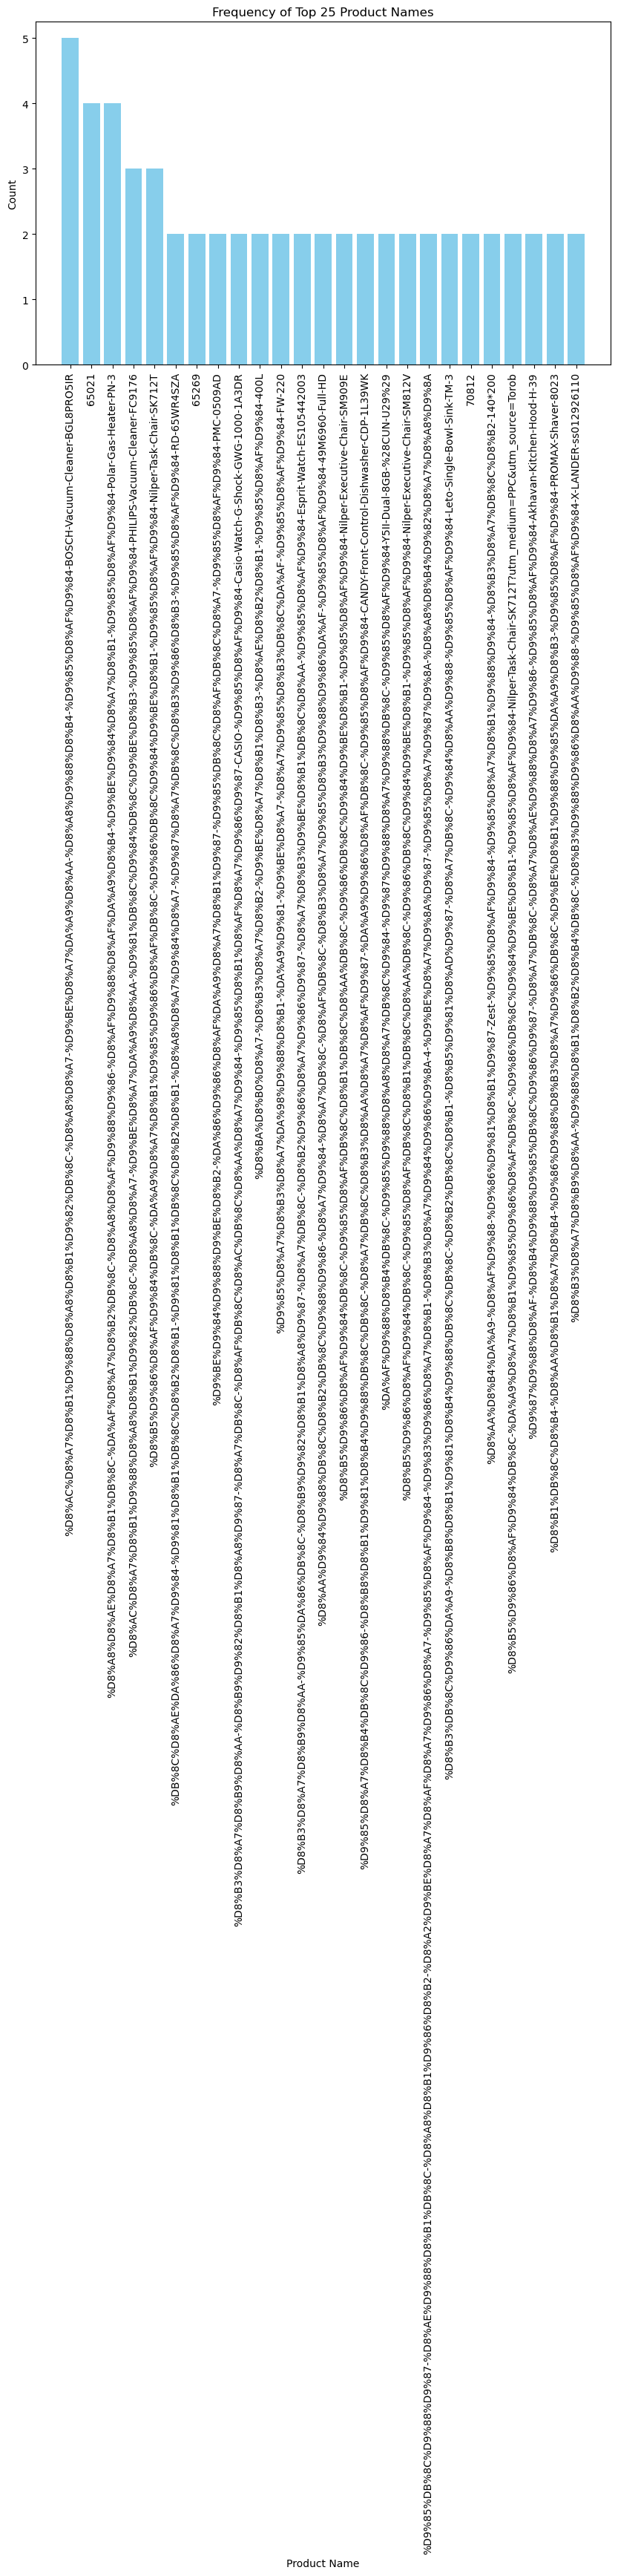

In [28]:
# Extracting the product names from the Request URL column using string manipulation or regular expressions
df['Product Name'] = df['Request URL'].str.extract(r'/product/\d+/([^/]+)/?$')

# the frequency of each product name
product_name_counts = df['Product Name'].value_counts()

# Sorting the product names based on their frequency in descending order
product_name_counts = product_name_counts.sort_values(ascending=False)
top_25_product_name_counts = product_name_counts.head(25)

# a vertical bar plot to visualize the frequency of top 25 product names
plt.figure(figsize=(10, 6))
plt.bar(top_25_product_name_counts.index, top_25_product_name_counts.values, color='skyblue')
plt.title('Frequency of Top 25 Product Names')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

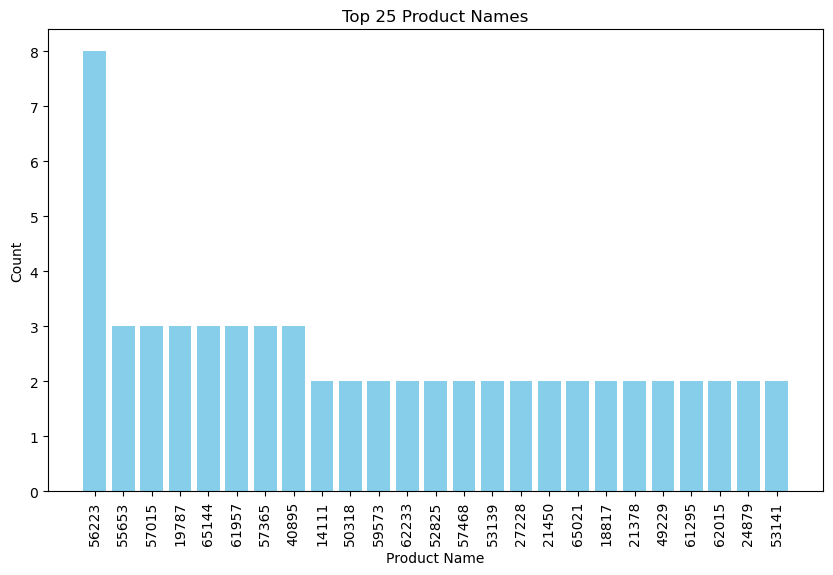

In [65]:
# Extract the product names from the Request URL column using string manipulation or regular expressions
df['Product Name'] = df['Request URL'].str.extract(r'/product/\d+/([^/]+)/')

# Count the frequency of each product name
product_name_counts = df['Product Name'].value_counts()

# Sorting the product names based on their frequency in descending order and select the top 25
top_10_product_names = product_name_counts.head(25)

# Create a vertical bar plot to visualize the frequency of top 25 product names
plt.figure(figsize=(10, 6))
plt.bar(top_10_product_names.index, top_10_product_names.values, color='skyblue')
plt.title('Top 25 Product Names')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

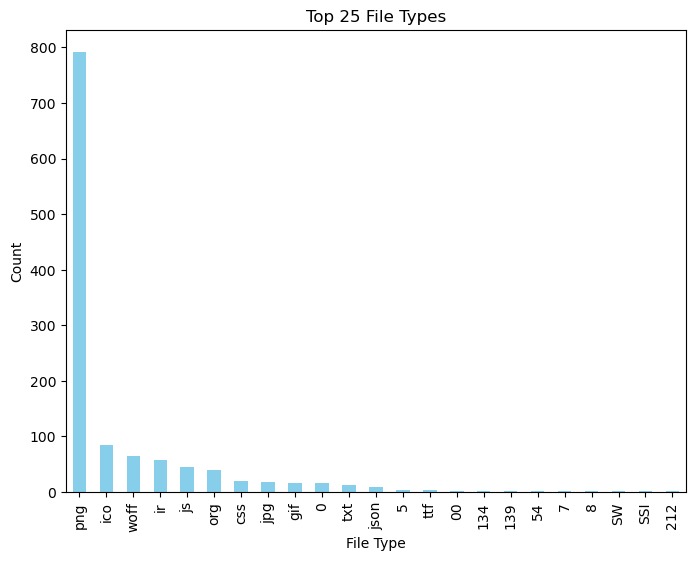

In [66]:
# the file type frequencies

df['File Type'] = df['Request URL'].str.extract(r'\.(\w+)$')

# Count the frequency of each file type
file_type_counts = df['File Type'].value_counts()

# Selecting the top 10 file types
top_10_file_types = file_type_counts.head(25)

# Create a bar chart to visualize the file type frequencies
plt.figure(figsize=(8, 6))
top_10_file_types.plot(kind='bar', color='skyblue')
plt.title('Top 25 File Types')
plt.xlabel('File Type')
plt.ylabel('Count')
plt.show()


In [67]:
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
import geoip2.database

# Open the geolocation database
reader = geoip2.database.Reader('GeoLite2-Country.mmdb')

# Creating an empty dictionary to store the hit count and unique IP addresses based on country
country_stats = {}

# Iterate over each IP address in the dataset
for ip_address in df['IP Address']:
    try:
        # geolocation lookup for the IP address
        response = reader.country(ip_address)

        # the country name from the response
        country = response.country.name

        # Increment the hit count for the country
        if country in country_stats:
            country_stats[country]['hits'] += 1
        else:
            country_stats[country] = {'hits': 1, 'ip_addresses': set()} 
        # Adding the IP address to the set of IP addresses for the country
        country_stats[country]['ip_addresses'].add(ip_address)

    except geoip2.errors.AddressNotFoundError:
        # AddressNotFoundError if the IP address is not found in the database
        pass

reader.close()

In [32]:
# Hardcoded country names and hit counts
country_list = ['Iran', 'United States', 'France', 'Germany', 'Netherlands', 'Ireland', 'China', 'Canada', 'Hong Kong', 'Slovenia', 'Finland', 'United Kingdom', 'Russia', 'Poland', 'Mexico', 'Denmark', 'South Africa', 'Romania', 'Japan']
hit_count_list = [4996, 3794, 569, 348, 153, 42, 25, 24, 18, 9, 7, 6, 3, 1, 1, 1, 1, 1, 1]

# Creating a pandas DataFrame from the hardcoded lists
country_df = pd.DataFrame({'Country': country_list, 'Hit Count': hit_count_list})

# Creating a map centered on a specific location
map_center = [0, 0]  # Adjust the coordinates as per your preference
m = folium.Map(location=map_center, zoom_start=2)

# Create a geocoder object
geolocator = Nominatim(user_agent="my-app")

# Function to handle geocoding request timeouts and retries
def geocode_with_timeout(address):
    try:
        return geolocator.geocode(address, timeout=10)
    except GeocoderTimedOut:
        time.sleep(1)  # Delay for 1 second
        return geocode_with_timeout(address)

# Iterate over the countries and add markers to the map
for _, row in country_df.iterrows():
    country = row['Country']
    hit_count = row['Hit Count']

    # Creating the popup message
    popup_text = f"<strong>Country:</strong> {country}<br><br><strong>Hit Count:</strong> {hit_count}"

    # geocoding to get the coordinates of the country
    location_data = geocode_with_timeout(country)
    if location_data:
        latitude = location_data.latitude
        longitude = location_data.longitude

        # Create a marker for the country with popup displaying the details
        marker = folium.Marker(location=[latitude, longitude], popup=popup_text)
        marker.add_to(m)

# Displaying the map
m


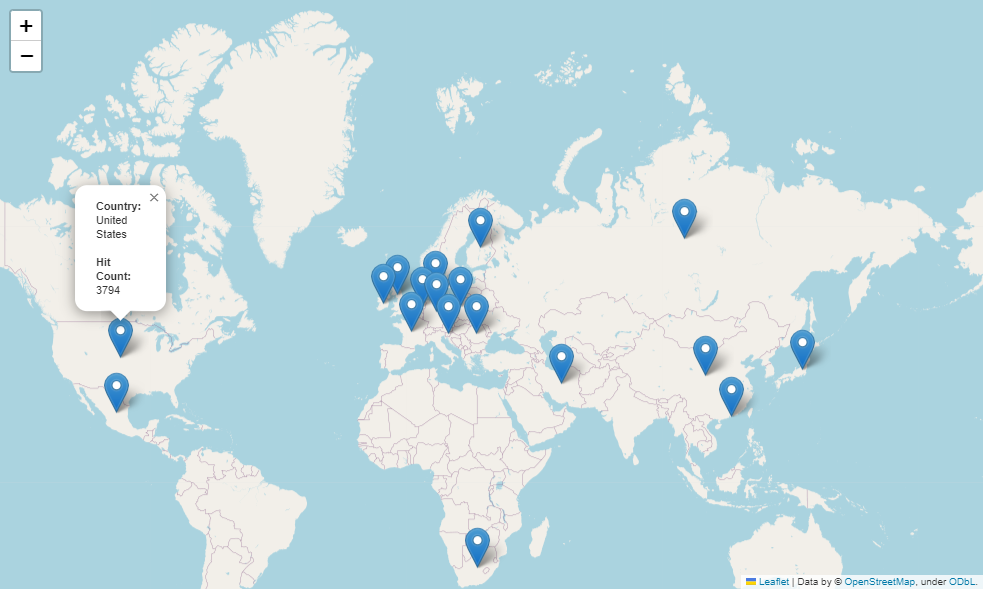

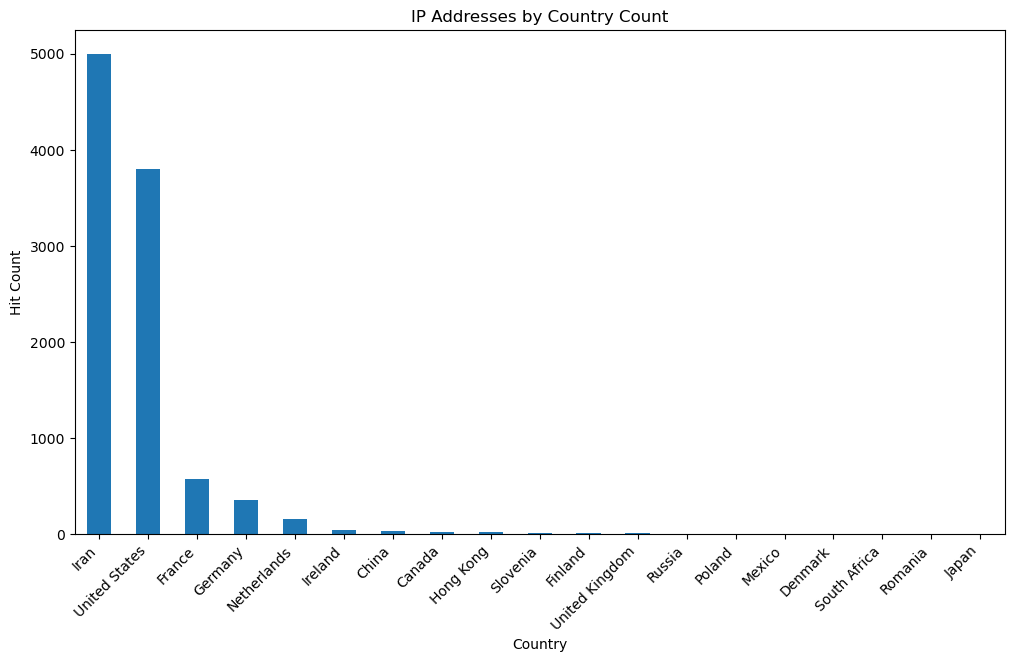

In [47]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12, 8) 

# Plot the bar plot
country_df.plot(kind='bar', legend=False)
plt.xlabel('Country')
plt.ylabel('Hit Count')
plt.title('IP Addresses by Country Count')
plt.xticks(rotation=45, ha='right') 
plt.subplots_adjust(bottom=0.25)  
plt.show()

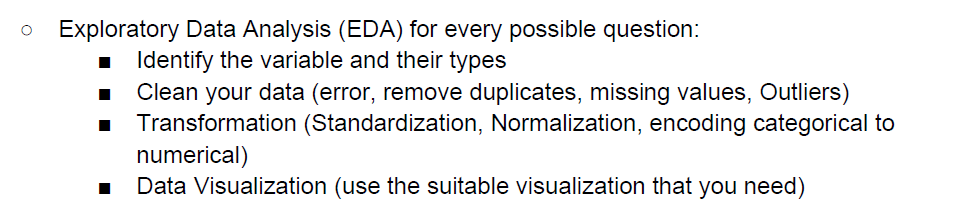

In [48]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype                                
---  ------                --------------  -----                                
 0   IP Address            10000 non-null  object                               
 1   Timestamp             10000 non-null  datetime64[ns, pytz.FixedOffset(210)]
 2   HTTP Method           10000 non-null  object                               
 3   Request URL           10000 non-null  object                               
 4   HTTP Protocol         10000 non-null  object                               
 5   Response Code         10000 non-null  object                               
 6   Response Size         10000 non-null  int64                                
 7   User-Agent            10000 non-null  object                               
 8   Referrer Information  10000 non-null  object                               
 

## Clean your data(error, remove duplicates, missing values, outliers)

In [49]:
has_errors = False
print("Errors in dfFrame:")
for column in df.columns:
    try:
        # Checking for missing values in the column
        if df[column].isnull().any():
            has_errors = True
            print("Error: Missing values found in column:", column)
            print(df[df[column].isnull()])

        # Checking for out-of-range errors
        errors = df[(df[column] < df[column].min()) | (df[column] > df[column].max())]
        if not errors.empty:
            has_errors = True
            print("Errors found in column:", column)
            print(errors)

    except TypeError:
        print("Error: Non-numeric values found in column:", column)
        has_errors = True

if not has_errors:
    print("No errors found in dfFrame")


Errors in dfFrame:
Error: Missing values found in column: Product ID
         IP Address                 Timestamp HTTP Method  \
0      54.36.149.41 2019-01-22 03:56:14+03:30         GET   
1       31.56.96.51 2019-01-22 03:56:16+03:30         GET   
2       31.56.96.51 2019-01-22 03:56:16+03:30         GET   
3     40.77.167.129 2019-01-22 03:56:17+03:30         GET   
5     40.77.167.129 2019-01-22 03:56:17+03:30         GET   
...             ...                       ...         ...   
9995   23.101.169.3 2019-01-22 04:37:49+03:30         GET   
9996   23.101.169.3 2019-01-22 04:37:49+03:30         GET   
9997   23.101.169.3 2019-01-22 04:37:49+03:30         GET   
9998   23.101.169.3 2019-01-22 04:37:49+03:30         GET   
9999   23.101.169.3 2019-01-22 04:37:49+03:30         GET   

                                            Request URL HTTP Protocol  \
0     /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C...      HTTP/1.1   
1                     /image/60844/productModel/200x

# Finding outliers using IQR and visualize using Boxplot

There is no numric column so we can not perform this technique to detect and visulize outlier

# Normality test for detecting outliers

In [53]:
from scipy import stats
import matplotlib.pyplot as plt

def detect_outliers(data, threshold=1.5, categorical_threshold=0.05):
    outliers = {}

    for column in data.columns:
        column_data = data[column]
        if pd.api.types.is_numeric_dtype(column_data):
            alpha = 0.05
            stat, p = stats.shapiro(column_data.dropna())

            if p > alpha:
                # Normal distribution, using Z-score method (Shapiro-Wilk test)
                z_scores = np.abs(stats.zscore(column_data))
                column_outliers = column_data[z_scores > threshold]
            else:
                # Non-normal distribution, use Tukey's method
                q1 = np.percentile(column_data, 25)
                q3 = np.percentile(column_data, 75)
                iqr = q3 - q1
                lower_bound = q1 - threshold * iqr
                upper_bound = q3 + threshold * iqr
                column_outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]

            if not column_outliers.empty:
                outliers[column] = column_outliers
        else:
            # Handle non-numeric columns (e.g., categorical columns)
            value_counts = column_data.value_counts(normalize=True)
            column_outliers = column_data[column_data.isin(value_counts[value_counts < categorical_threshold].index)]
            
            if not column_outliers.empty:
                outliers[column] = column_outliers

    return outliers

import numpy as np


In [58]:
import numpy as np

def visualize_outliers(outliers):
    if outliers:
        plt.figure(figsize=(12, 8))
        for i, (column, column_outliers) in enumerate(outliers.items(), start=1):
            x_values = [i] * len(column_outliers)
            y_values = np.arange(len(column_outliers))  # Convert y-axis values to integers
            plt.scatter(x_values, y_values, color='red', marker='o', label='Outliers')

        plt.xlabel('Columns')
        plt.ylabel('Indices')  # Update y-axis label
        plt.title('Outliers')
        plt.xticks(np.arange(1, len(outliers) + 1), list(outliers.keys()), rotation=90)  # Rotate x-axis labels by 90 degrees       
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')


E:\Jupyter notebook\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
E:\Jupyter notebook\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


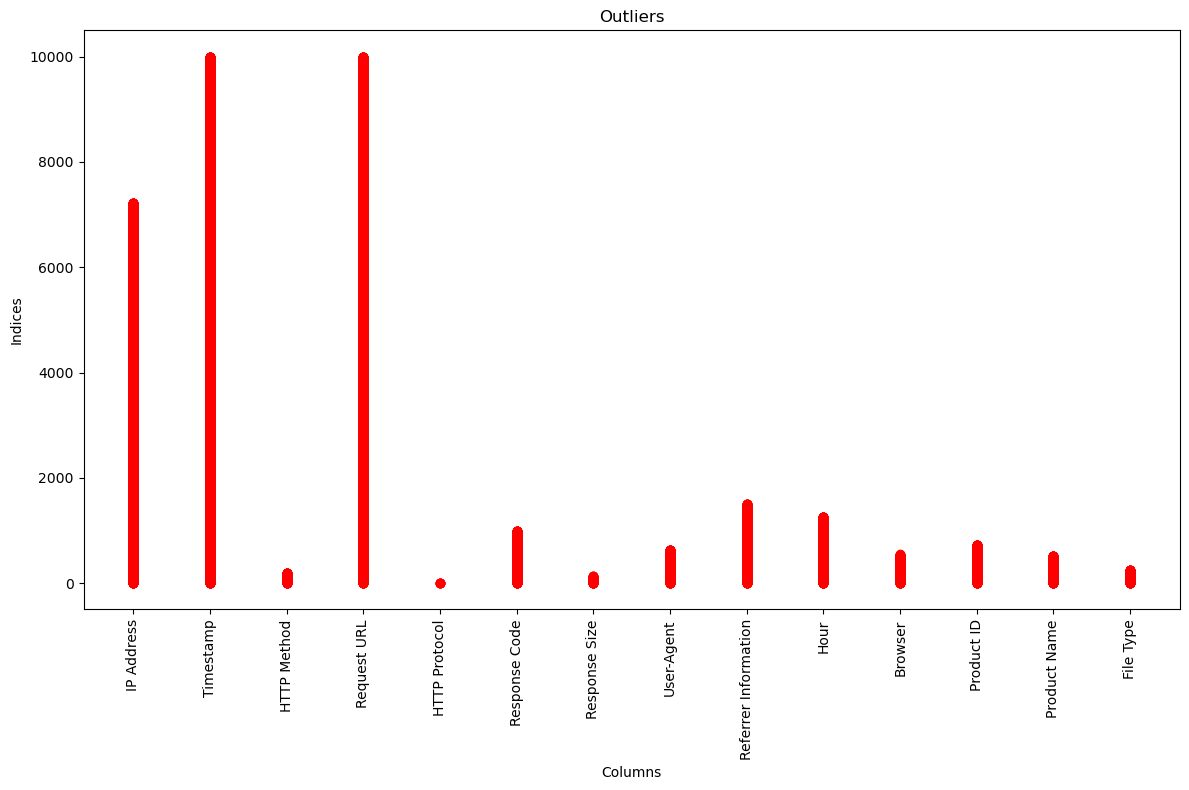

In [59]:
outliers = detect_outliers(df)
visualize_outliers(outliers)

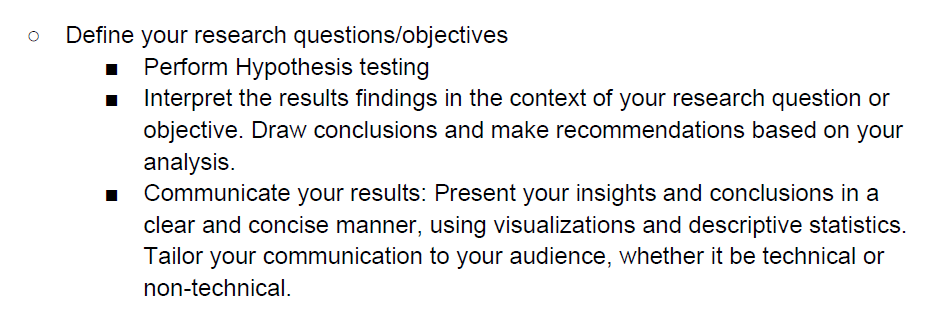

### Research Question: Is there a difference in the average response size between different HTTP methods?

##### H0: There is no difference in the average response size between different HTTP methods.
##### H1: There is a difference in the average response size between different HTTP methods.

In [60]:
from scipy.stats import f_oneway

# Subset the DataFrame to include only the relevant columns for the hypothesis test
subset_df = df[['HTTP Method', 'Response Size']]

# Group the response sizes by HTTP method
groups = [group['Response Size'] for _, group in subset_df.groupby('HTTP Method')]

# one-way ANOVA test
statistic, p_value = f_oneway(*groups)


alpha = 0.05
print("P value: ",p_value)

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant difference in the average response size between different HTTP methods.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to support a difference in the average response size between different HTTP methods.")


P value:  6.571607734109366e-18
Reject the null hypothesis.
There is a statistically significant difference in the average response size between different HTTP methods.


Based on the performed hypothesis testing, it was found that there is a statistically significant difference in the average response size between different HTTP methods. The null hypothesis was rejected, indicating that the HTTP method does have an impact on the response size.

To further investigate this relationship, it is recommended to utilize regression analysis as a model. Regression analysis allows for quantifying the influence of various factors, including the HTTP method, on the response size. By including other relevant variables such as timestamp, IP address, or user-agent as independent variables, it is possible to gain more insights and control for potential confounding factors.

Additionally, considering other machine learning models such as decision trees, random forests, or gradient boosting could be beneficial, particularly for capturing non-linear relationships and interactions between variables. These models can offer more accurate predictions of response size based on multiple input features.

In communicating the results, it is important to present the findings in a clear and concise manner using visualizations and descriptive statistics. Consider tailoring the communication to the intended audience, whether they are technical or non-technical, to effectively convey the insights and conclusions drawn from the analysis.

Overall, the analysis suggests that the HTTP method is a significant factor in determining the response size. By further exploring the relationship through regression analysis and potentially employing machine learning models, a more comprehensive understanding can be gained, leading to more robust conclusions and recommendations.